In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
import time
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn import datasets
from scipy.stats import uniform
from sklearn import metrics
from sklearn.pipeline import FeatureUnion 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import time
np.random.seed(123)

In [16]:
#GridSearchCV inserted into a function that streamlines the process
def perform_gridsearch(features,labels):
    penalty = ['l1', 'l2']
    C = np.logspace(0, 4, 10)
    logistic = linear_model.LogisticRegression()
    # Create range of candidate penalty hyperparameter values
    penalty = ['l1', 'l2']
    # Create range of candidate regularization hyperparameter values C
    C = np.logspace(0, 4, 10)
    # Create dictionary hyperparameter candidates
    hyperparameters = dict(C=C, penalty=penalty)
    gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=1) # Fit grid search
    best_model = gridsearch.fit(features,labels)
    predictions = best_model.predict(features)
    fpr, tpr, thresholds = metrics.roc_curve(labels,predictions)
    print(predictions)
    print(fpr,tpr,thresholds)
    print('Best Model Parameters:', best_model.best_estimator_) 
    print('Best C:', best_model.best_estimator_.get_params()['C'])
    print("The mean accuracy of the model is:",best_model.score(features,labels))

In [23]:
def perform_randomized_search(features,labels):
    # Create logistic regression
    logistic = linear_model.LogisticRegression()
    # Create range of candidate regularization penalty hyperparameter values
    penalty = ['l1', 'l2']
    # Create distribution of candidate regularization hyperparameter values
    C = uniform(loc=0, scale=4)
    # Create hyperparameter options
    hyperparameters = dict(C=C, penalty=penalty)
    # Create randomized search
    randomizedsearch = RandomizedSearchCV(
    logistic, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=1)
    # Fit randomized search
    best_model = randomizedsearch.fit(features,labels)
    predictions=best_model.predict(features)
    fpr, tpr, thresholds = metrics.roc_curve(labels,predictions)
    print(fpr, tpr, thresholds)
    print('Best Penalty:', best_model.best_estimator_) 
    print('Best C:', best_model.best_estimator_.get_params()['C'])
    print("The mean accuracy of the model is:",best_model.score(features,labels))

In [37]:
def execute_pipeline(features,labels):
    #Preprocessing
    pca_components = PCA() ## if n_components not specified, keeps all components
    std_scaler = StandardScaler()
    preprocess = FeatureUnion([("std",std_scaler), ("pca", pca_components)])
    # Create a pipeline
    pipe = Pipeline([("classifier", LogisticRegression())])
    # Create dictionary with candidate learning algorithms and their hyperparameters
    search_space = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100,200],
                 "classifier__max_depth":[5,8,15,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15],
                 "classifier__max_leaf_nodes": [2, 5,10]
                 },
                 {"classifier": [SVC()],
                 "classifier__C": [0.01,0.1,1,10,100],
                 "classifier__kernel":['linear','rbf','sigmoid']
                }]
                 
    gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=1,n_jobs=-1) # Fit grid search
    best_model = gridsearch.fit(features,labels)
    predictions = best_model.predict(features)
    fpr_pipe, tpr_pipe, thresholds_pipe = metrics.roc_curve(labels,predictions)
    print(fpr_pipe, tpr_pipe, thresholds_pipe)
    print(best_model.best_estimator_)
    print("The mean accuracy of the model is:",best_model.score(features,labels))

In [4]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.cp=heart.cp.astype('category')
heart.fbs=heart.fbs.astype('category')
heart.restecg=heart.restecg.astype('category')
heart.ca=heart.ca.astype('category')
heart.thal=heart.thal.astype('category')
heart.exang=heart.exang.astype('category')

In [6]:
heart = pd.get_dummies(heart)

In [7]:
features = heart.drop('target',axis=1)
labels = heart.loc[:,'target']

In [8]:
features = pd.DataFrame(features)
labels = pd.DataFrame(labels)

In [12]:
#Baseline logistic model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)

clf = LogisticRegression()
model = clf.fit(x_train,y_train)
predictions = model.predict(x_test)
model.score(x_test,y_test)


0.9016393442622951

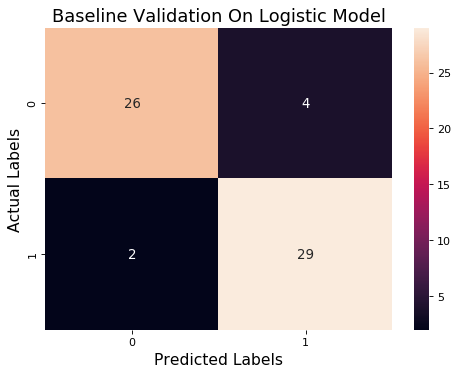

In [15]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
array = confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(array)
plt.figure(figsize=(7,5),dpi=80)
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12})
plt.xlabel('Predicted Labels',fontsize=14)
plt.ylabel('Actual Labels',fontsize=14)
plt.title('Baseline Validation On Logistic Model',fontsize=16)
plt.savefig("confusion_mat.png")

In [21]:
perform_gridsearch(features,labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 1]
[0.        0.1884058 1.       ] [0.         0.91515152 1.        ] [2 1 0]
Best Model Parameters: LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
Best C:

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


In [24]:
perform_randomized_search(features,labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.         0.18115942 1.        ] [0.         0.91515152 1.        ] [2 1 0]
Best Penalty: LogisticRegression(C=0.5615477543809351, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
Best C: 0.5615477543809351
The mean accuracy of the model is: 0.8712871287128713


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.8s finished


In [38]:
execute_pipeline(features,labels)

Fitting 3 folds for each of 195 candidates, totalling 585 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    7.6s


[0.         0.18115942 1.        ] [0.         0.91515152 1.        ] [2 1 0]
Pipeline(memory=None,
     steps=[('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
The mean accuracy of the model is: 0.8712871287128713


[Parallel(n_jobs=-1)]: Done 585 out of 585 | elapsed:   34.3s finished


In [26]:
fpr=[0.,        0.1884058, 1.       ]
tpr=[0.,         0.91515152, 1.        ]
threshholds=[2,1,0]

In [27]:
fpr_rand = [0.,         0.18115942, 1.        ]
tpr_rand = [0.,         0.91515152, 1.        ]
thresh_rand = [2,1,0]

In [39]:
fpr_pipe = [0.,         0.15427862, 1.]
tpr_pipe =[0.,         0.92431023,1.]
thresh_pipe = [2,1,0]

0.9867986798679867

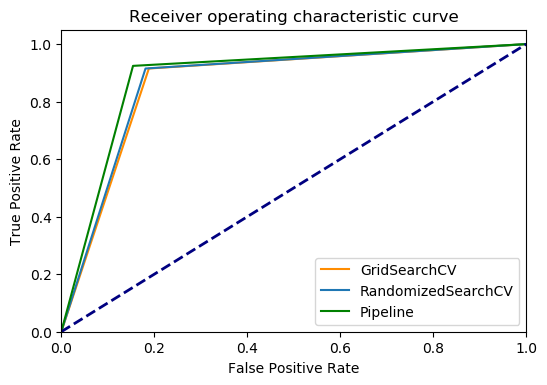

<Figure size 432x288 with 0 Axes>

In [48]:
#ROC Curve
plt.figure(dpi=100)
lw = 2
plt.plot(fpr,tpr, color='darkorange',label='GridSearchCV')
plt.plot(fpr_rand,tpr_rand,label='RandomizedSearchCV')
plt.plot(fpr_pipe,tpr_pipe,color='green',label='Pipeline')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend()
plt.show()
plt.savefig("roc.png")

In [51]:
corr = heart.corr()

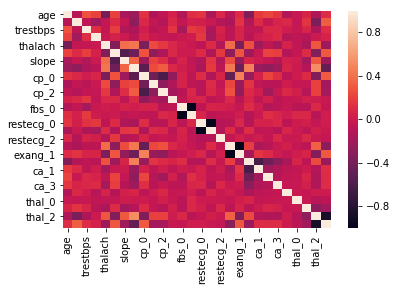

In [52]:
sns.heatmap(corr)